# Homework Four

In [94]:
#Imports 
import numpy as np
from matplotlib import pyplot as plt
import math
from hyperion.model import AnalyticalYSOModel
from astropy import units as u
from hyperion.util.constants import *
from hyperion.densities.bipolar_cavity import BipolarCavity
from hyperion.model import ModelOutput
from time import time
import math
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

## Problem Two

- Photons created by nuclear fusion at the Sun’s center do not simply escape or “free-stream” outwards. Instead, they take a significant amount of time to get out due to the high probability of scattering (owing to the relatively large Thomson cross section for scattering), i.e., they take a random walk.

- Assume the typical mean free path of a photon is l '4x10−1 cm. Let’s consider a theorist’s sun, which is a 2 dimensional circle with radius 1R . Every time a photon hits an electron (after going 1 mean free path), it is scattered in an arbitrary direction θ. Roughly how long does it take for a photon to escape the Sun after being emitted? (You can round to the nearest power of 10).

- Note, you cannot do this problem by using the actual solar radius  your code will never finish. So, assume a solar radius of 7 cm and see what you get. Then assume a solar radius of 70 cm

- Use a timer function to figure out how long the "walk clock time" for your code is, i.e., how long do you have to wait for you code to finish. What general lessons do you learn from this exercise?

In [95]:
#Variables and Arrays
MFP = 4 * 10**(-1) #cm
Solar_Radius_1 = 7 #cm
Solar_Radius_2 = 70 #cm

a = 2004863
c = 9001852867
m = 7698231002
seed = np.random.rand() #Starting seed, not included in final can be anything 

Loop_Range = np.arange(10**5) 

Random_numbers = []

theta = np.linspace(0, 2 * np.pi, 1000)

In [96]:
#Getting the circle
def circle(radius, center_x, center_y):
    x = np.add(np.multiply(radius, np.cos(theta)), center_x)
    y = np.add(np.multiply(radius, np.sin(theta)), center_y)
    
    return x, y

In [97]:
# Creating my own random number generator 
def random_numb(seed):
    return (a * seed + c)%m

In [98]:
# Getting the random numbers 
for i in Loop_Range:
    
    new_seed = random_numb(seed)
    Random_numbers.append(new_seed)
    seed = new_seed

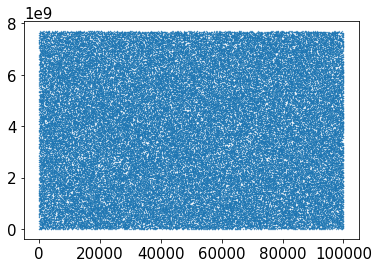

In [105]:
# Plotting just to see
plt.scatter(Loop_Range, Random_numbers, s = 0.1)

In [100]:
dist = 0
start_x = 0 
start_y = 0
x_pos = []
y_pos = []
x_new = 0
y_new = 0

start = time()

while dist < (7**2):
    
    new_seed = random_numb(seed)
    seed = new_seed     
    
    dist = (start_x**2) + (start_y**2)
            
    x_new = np.multiply(MFP, np.cos(seed)) + start_x
    y_new = np.multiply(MFP, np.sin(seed)) + start_y
    
    start_x = x_new 
    start_y = y_new 
    
    x_pos.append(x_new)
    y_pos.append(y_new)
    
print(f'Time: {time() - start} seconds')

Time: 0.0028791427612304688 seconds


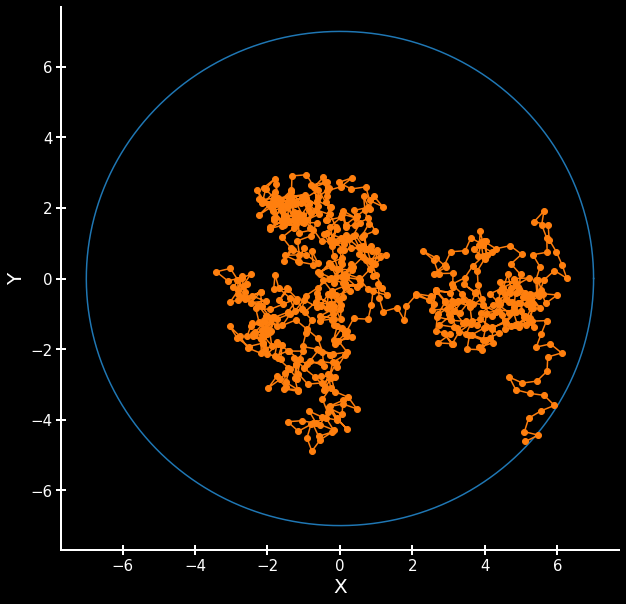

In [101]:
#Plotting

fig = plt.figure(figsize = (10,10), facecolor = "black")
ax = plt.subplot(1,1,1) 

plt.plot(circle(7,0,0)[0], circle(7,0,0)[1])
plt.plot(x_pos, y_pos, linestyle = '-', marker = 'o')

ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size

#plt.legend(facecolor = "black", labelcolor = "white", fontsize = 15, frameon = False, bbox_to_anchor=(1, 1), loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Y' , size = '20', color = "white")
plt.xticks(size = '15')
plt.yticks(size = '15')


plt.show()

In [102]:
dist = 0
start_x = 0 
start_y = 0
x_pos = []
y_pos = []
x_new = 0
y_new = 0
Total_moves = 0
Distance_Total = 0

start = time()
    
seed = np.random.rand()

while dist < (70**2):
    
    new_seed = random_numb(seed)
    seed = new_seed     
    
    dist = (start_x**2) + (start_y**2)
    #dist_delt = (((start_x - x_new)**2) + ((start_y - y_new)**2))
    #Distance_Total = Distance_Total + dist_delt
              
    x_new = np.multiply(MFP, np.cos(seed)) + start_x
    y_new = np.multiply(MFP, np.sin(seed)) + start_y
    
    dist_delt = (((2*start_x - x_new)**2) + ((2*start_y - y_new)**2)) ** (1/2) #Times 2 becasue I already add on the starts
    Distance_Total = Distance_Total + dist_delt
    
    start_x = x_new
    start_y = y_new
    
    x_pos.append(x_new)
    y_pos.append(y_new)
    
    Total_moves = Total_moves + 1
    

In [103]:
# Getting the total time and distance to leave the sun given the model
    # How long to leave the 70cm sun
Dist_Total = (Distance_Total) * 0.01 # cm to m 
Total_Time = Dist_Total / 2.99e8 # s

    #Scaling this to the sun 
Ratio = (((70 * 0.01)**2) / (6.96e8**2))**(-1)

    #Leaving the sun
Dist_leave_sun = Ratio * Dist_Total
Time_leave_sun = (Ratio * Total_Time) / 3.15e7

print("Distance to leave the sun = " +str(Dist_leave_sun)+ " m")
print("Time to leave the sun = " +str(Time_leave_sun)+ ' yr')


Distance to leave the sun = 9.789754455820348e+21 m
Time to leave the sun = 1039417.5777268512 yr


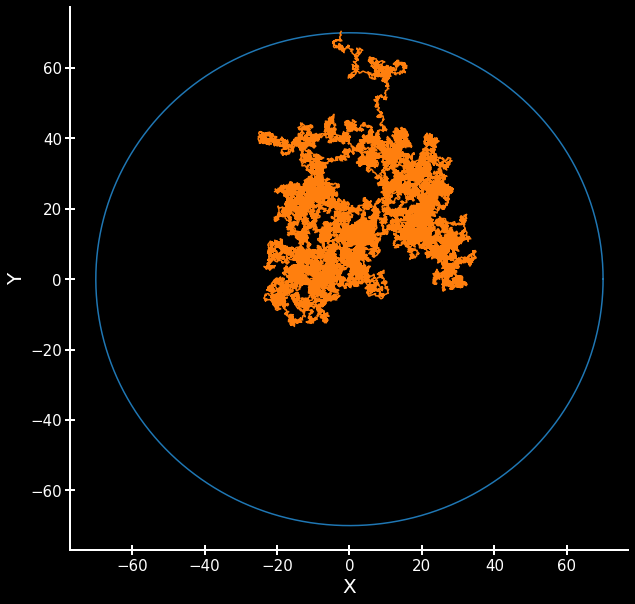

In [104]:
#Plotting

fig = plt.figure(figsize = (10,10), facecolor = "black")
ax = plt.subplot(1,1,1) 

plt.plot(circle(70,0,0)[0], circle(70,0,0)[1])
plt.plot(x_pos, y_pos, linestyle = '-', marker = '.', markersize = 0.1)

ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size

#plt.legend(facecolor = "black", labelcolor = "white", fontsize = 15, frameon = False, bbox_to_anchor=(1, 1), loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(r'X'  , size = '20', color = "white")
plt.ylabel(r'Y' , size = '20', color = "white")
plt.xticks(size = '15')
plt.yticks(size = '15')


plt.show()

For the 7cm sun the code took about 0.0006 seconds and for the 70cm sun the code took about 0.4 seconds. This is about a order of magnitude diference of about 10^3 difference. It take significantly longer to run this code for larger radi. Running this code for the actual sun would take a really long time and something would have to be done to decrease the runtime. 

## Problem Three

## Part A

- Search through the code and documentation and determine how and where random numbers are being used in Hyperion (in particular focus on the core algorithm and physics and ignore random numbers appearing in test problems, i.e., the tests directory, and documentation, i.e., the docs directory, although these can explain what is happening). Where and why are they invoked? What generation method is being used? For a given run with identical parameters will the results be deterministic? If you’re not sure you can check!

   - From the docs it looks like Hyperion's main use of random numbers has to deal with random walks. Specifically with the code's diffusion process that utalizes the MRW. The random numbers are generated via an MC apporoach and are used to allow the code to let photons escape high density regions without taking up too much computational resources. It also allows temperatures in these regions to be calulated when there are no or very few photons present. In instance where the MRW diffusion is used (when m.set_mrw(True, gamma = )) the result should turn out to have some randomness to them meaning that they wouldn't be considered to be deterministic. However, in cases where this isn't used, no randomness utilized, then the results should be deterministic. Even if both cases utalize the same parameters.

        - https://www.aanda.org/articles/aa/pdf/2009/13/aa11470-08.pdf, https://www.aanda.org/index.php?option=com_article&access=doi&doi=10.1051/0004-6361/201015025&Itemid=129, http://docs.hyperion-rt.org/en/stable/setup/setup_conf.html#diffusion

- 

## Part B

In [130]:
m = AnalyticalYSOModel()

    #Star luminosity , Radius , Temperature, mass
m.star.radius = 2.0 * rsun
m.star.temperature = 6200
m.star.luminosity = 5.0 * lsun
m.star.mass = 0.5 * msun

    #Flared Disk
disk = m.add_flared_disk()
disk.mass = 0.01 * msun
disk.rmin = 10 * rsun
disk.rmax = 200 * au
disk.r_0 = m.star.radius
disk.h_0 = 0.01 * disk.r_0
disk.p = -1.0
disk.beta = 1.25

    #Envelope
envelope = m.add_ulrich_envelope()
envelope.mass = 0.4 * msun
envelope.rc = disk.rmax
envelope.mdot = 5.e-6 * msun / yr
envelope.rmin = 200 * au
envelope.rmax = 10000 * au
envelope.p = -2.0

    #Cavity
cavity = envelope.add_bipolar_cavity()
cavity.power = 1.5
cavity.theta_0 = 20
cavity.r_0 = envelope.rmax
cavity.rho_0 = 5e4 * 3.32e-24
cavity.rho_exp = 0.

    #Dust
#cavity = BipolarCavity()
disk.dust = '/home/mrk2885/Downloads/hyperion-dust-0.1.0/dust_files/kmh94_3.1_full.hdf5'
envelope.dust = '/home/mrk2885/Downloads/hyperion-dust-0.1.0/dust_files/kmh94_3.1_full.hdf5'
cavity.dust = '/home/mrk2885/Downloads/hyperion-dust-0.1.0/dust_files/kmh94_3.1_full.hdf5'

    #Random Walk
m.set_mrw(True, gamma = 2.)

    #Grid
m.set_spherical_polar_grid_auto(200, 100, 5)

    #Raytracing
m.set_raytracing(True)

In [131]:
# Number of photons
m.set_n_photons(initial = 10000, imaging = 10000, raytracing_sources = 10000, raytracing_dust = 10000)

In [132]:
# Temp and convergence 
m.set_n_initial_iterations(10)
m.set_convergence(True, percentile = 99.0, absolute = 2.0, relative = 1.1)

In [133]:
# Getting the SEDs
sed  = m.add_peeled_images(sed = True, image = False)
sed.set_viewing_angles(np.linspace(0., 90., 10), np.repeat(45, 10))
#sed.set_viewing_angles(np.array([45]), np.array([45]))
sed.set_wavelength_range(150, 0.02, 2000)

In [134]:
m.write('model_12.rtin')
m.run('model_12.rtout', mpi = False)

/home/mrk2885/anaconda3/lib/python3.8/site-packages/hyperion/util/functions.py:24: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(random_id(), driver='core', backing_store=False)


INFO: Disk density is being re-scaled by a factor of 0.96 to give the correct mass. [hyperion.densities.flared_disk]


/home/mrk2885/anaconda3/lib/python3.8/site-packages/hyperion/densities/ulrich_envelope.py:35: RuntimeWarning: invalid value encountered in power
  s = dr ** (1. / 3.)
/home/mrk2885/anaconda3/lib/python3.8/site-packages/hyperion/densities/ulrich_envelope.py:40: RuntimeWarning: invalid value encountered in power
  t = dr ** (1. / 3.)


INFO: Merging densities (identical hashes) [hyperion.model.model]
INFO: Merging densities (identical hashes) [hyperion.model.model]


In [135]:
Model_Output = ModelOutput('model_12.rtout')
sed_1 = Model_Output.get_sed(aperture = -1, distance = 300. * pc)

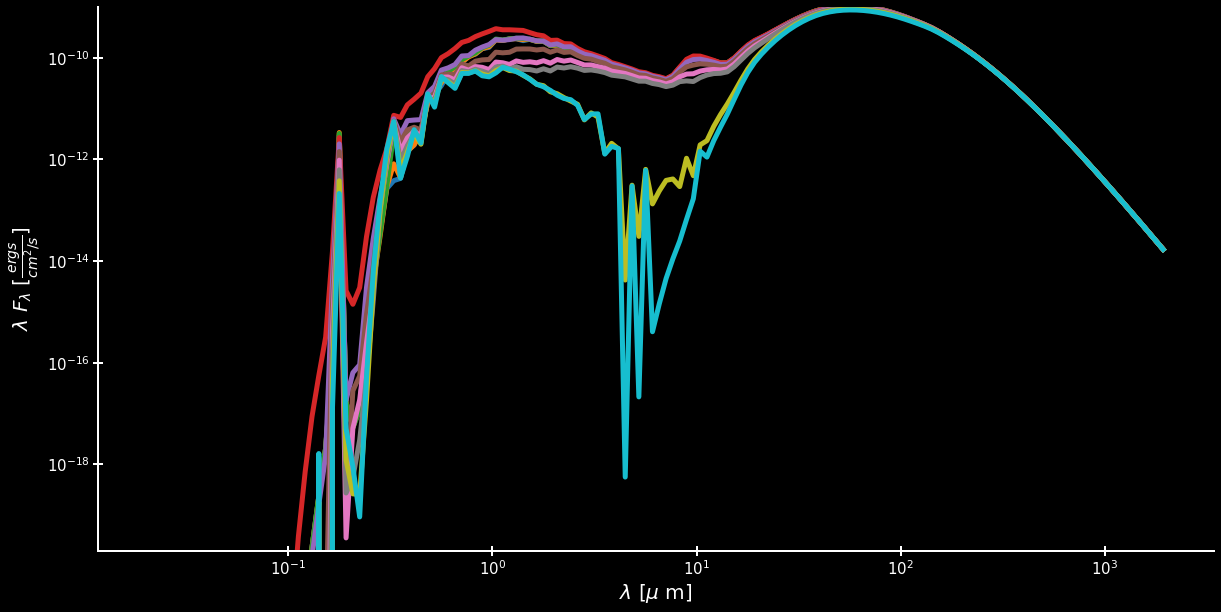

In [153]:
fig = plt.figure(figsize = (20,10), facecolor = "black")
ax = plt.subplot(1,1,1) 

ax.loglog(sed_1.wav, sed_1.val.transpose(), linewidth = 5)

ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
plt.rc('font', size = 15) #Fixes the scientific notation font size

#plt.legend(facecolor = "black", labelcolor = "white", fontsize = 15, frameon = False, bbox_to_anchor=(1, 1), loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(r'$\lambda$ [$\mu$ m]'  , size = '20', color = "white")
plt.ylabel(r'$\lambda$ $F_{\lambda}$ [$\frac{ergs}{cm^2/s}$]' , size = '20', color = "white")
plt.xticks(size = '15')
plt.yticks(size = '15')

plt.ylim(2.e-20, 1e-9)

plt.show()

- The SED looks like its a combination of the star's emission and the emmission from its disk. (I found a diagram showing these part seperatly link below.) It looks like the disk portion the the right of this plot even shows some differnt bumps associated with different parts of the disk.

- As the code runs through the different veiwing angle it seems like the absorptions increases as the viewing angle heads to 90 deg and decreases as the veiwing angle goes to 0 deg.


-https://ay201b.wordpress.com/doo_bop_sha_doo_bo_sha_bop_bam_boo/#:~:text=The%20SED%2C%20or%20Spectral%20Energy,to%20more%20detailed%20spectral%20measurements.

## Part C

- c) Vary the number of photon packets and grid resolution. How many photons and what resolution would you need to produce a converged SED? Describe your convergence criteria and make a plot showing the dependence of the SED on different values.

In [154]:
sed.set_viewing_angles(np.array([45]), np.array([45]))

In [20]:
#Grid
m.set_spherical_polar_grid_auto(50, 25, 5)
# Number of photons
m.set_n_photons(initial = 10000, imaging = 10000, raytracing_sources = 10000, raytracing_dust = 10000)

# Getting the SEDs
sed  = m.add_peeled_images(sed = True, image = False)
sed.set_viewing_angles(np.linspace(0., 90., 10), np.repeat(45, 10))
sed.set_viewing_angles(np.array([45]), np.array([45]))
sed.set_wavelength_range(150, 0.02, 2000)

m.write('model_g1.rtin')
m.run('model_g1.rtout', mpi = False)

Model_Output = ModelOutput('model_g1.rtout')
sed_g1 = Model_Output.get_sed(aperture = -1, distance = 300. * pc)

/home/mrk2885/anaconda3/lib/python3.8/site-packages/hyperion/util/functions.py:24: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(random_id(), driver='core', backing_store=False)


INFO: Disk density is being re-scaled by a factor of 0.82 to give the correct mass. [hyperion.densities.flared_disk]


/home/mrk2885/anaconda3/lib/python3.8/site-packages/hyperion/densities/ulrich_envelope.py:35: RuntimeWarning: invalid value encountered in power
  s = dr ** (1. / 3.)
/home/mrk2885/anaconda3/lib/python3.8/site-packages/hyperion/densities/ulrich_envelope.py:40: RuntimeWarning: invalid value encountered in power
  t = dr ** (1. / 3.)
/home/mrk2885/anaconda3/lib/python3.8/site-packages/hyperion/densities/ulrich_envelope.py:356: RuntimeWarning: divide by zero encountered in true_divide
  * (1 + mu / mu0) ** -0.5
/home/mrk2885/anaconda3/lib/python3.8/site-packages/hyperion/densities/ulrich_envelope.py:357: RuntimeWarning: divide by zero encountered in true_divide
  * (mu / mu0 + 2. * mu0 ** 2 * self.rc / r) ** -1.)


INFO: Merging densities (identical hashes) [hyperion.model.model]


In [21]:
#Grid
m.set_spherical_polar_grid_auto(100, 50, 10)
# Number of photons
m.set_n_photons(initial = 10000, imaging = 10000, raytracing_sources = 10000, raytracing_dust = 10000)

# Getting the SEDs
sed  = m.add_peeled_images(sed = True, image = False)
sed.set_viewing_angles(np.linspace(0., 90., 10), np.repeat(45, 10))
sed.set_viewing_angles(np.array([45]), np.array([45]))
sed.set_wavelength_range(150, 0.02, 2000)

m.write('model_g2.rtin')
m.run('model_g2.rtout', mpi = False)

Model_Output = ModelOutput('model_g2.rtout')
sed_g2 = Model_Output.get_sed(aperture = -1, distance = 300. * pc)

INFO: Disk density is being re-scaled by a factor of 0.84 to give the correct mass. [hyperion.densities.flared_disk]


In [22]:
#Grid
m.set_spherical_polar_grid_auto(250, 150, 25)
# Number of photons
m.set_n_photons(initial = 10000, imaging = 10000, raytracing_sources = 10000, raytracing_dust = 10000)

# Getting the SEDs
sed  = m.add_peeled_images(sed = True, image = False)
sed.set_viewing_angles(np.linspace(0., 90., 10), np.repeat(45, 10))
sed.set_viewing_angles(np.array([45]), np.array([45]))
sed.set_wavelength_range(150, 0.02, 2000)

m.write('model_g3.rtin')
m.run('model_g3.rtout', mpi = False)

Model_Output = ModelOutput('model_g3.rtout')
sed_g3 = Model_Output.get_sed(aperture = -1, distance = 300. * pc)

INFO: Disk density is being re-scaled by a factor of 1.03 to give the correct mass. [hyperion.densities.flared_disk]


In [23]:
#Grid
m.set_spherical_polar_grid_auto(75, 50, 3)
# Number of photons
m.set_n_photons(initial = 10000, imaging = 10000, raytracing_sources = 10000, raytracing_dust = 10000)

# Getting the SEDs
sed  = m.add_peeled_images(sed = True, image = False)
sed.set_viewing_angles(np.linspace(0., 90., 10), np.repeat(45, 10))
sed.set_viewing_angles(np.array([45]), np.array([45]))
sed.set_wavelength_range(150, 0.02, 2000)

m.write('model_g4.rtin')
m.run('model_g4.rtout', mpi = False)

Model_Output = ModelOutput('model_g4.rtout')
sed_g4 = Model_Output.get_sed(aperture = -1, distance = 300. * pc)

INFO: Disk density is being re-scaled by a factor of 0.84 to give the correct mass. [hyperion.densities.flared_disk]


In [24]:
#Grid
m.set_spherical_polar_grid_auto(70, 30, 3)
# Number of photons
m.set_n_photons(initial = 10000, imaging = 10000, raytracing_sources = 10000, raytracing_dust = 10000)

# Getting the SEDs
sed  = m.add_peeled_images(sed = True, image = False)
sed.set_viewing_angles(np.linspace(0., 90., 10), np.repeat(45, 10))
sed.set_viewing_angles(np.array([45]), np.array([45]))
sed.set_wavelength_range(150, 0.02, 2000)

m.write('model_g5.rtin')
m.run('model_g5.rtout', mpi = False)

Model_Output = ModelOutput('model_g5.rtout')
sed_g5 = Model_Output.get_sed(aperture = -1, distance = 300. * pc)

INFO: Disk density is being re-scaled by a factor of 1.10 to give the correct mass. [hyperion.densities.flared_disk]


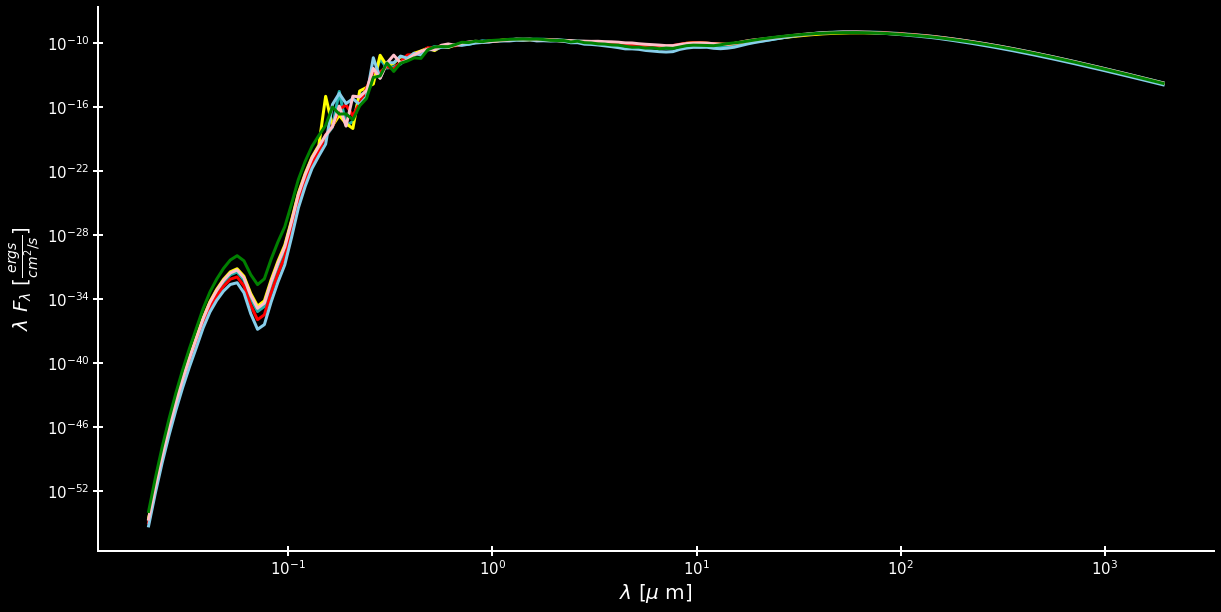

In [120]:
fig = plt.figure(figsize = (20,10), facecolor = "black")
ax = plt.subplot(1,1,1) 

ax.loglog(sed_g1.wav, sed_g1.val.transpose(), linewidth = 3, color = 'lightseagreen', label = '(50, 25, 5)')
ax.loglog(sed_g2.wav, sed_g2.val.transpose(), linewidth = 3, color = 'yellow', label = '(100, 50, 10)')
ax.loglog(sed_1.wav, sed_1.val.transpose(), linewidth = 3, color = 'red', label = '(200,100,5)')
ax.loglog(sed_g3.wav, sed_g3.val.transpose(), linewidth = 3, color = 'skyblue', label = '(250, 150, 25))')
ax.loglog(sed_g4.wav, sed_g4.val.transpose(), linewidth = 3, color = 'pink', label = '(75, 50, 3)')
ax.loglog(sed_g5.wav, sed_g5.val.transpose(), linewidth = 3, color = 'green', label = '(70, 30, 3)')

ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
#plt.ticklabel_format(axis='both', style='sci', scilimits=(3,4))
plt.rc('font', size = 15) #Fixes the scientific notation font size

#plt.legend(facecolor = "White", fontsize = 15, frameon = False, bbox_to_anchor=(1, 1), loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(r'$\lambda$ [$\mu$ m]'  , size = '20', color = "white")
plt.ylabel(r'$\lambda$ $F_{\lambda}$ [$\frac{ergs}{cm^2/s}$]' , size = '20', color = "white")
plt.xticks(size = '15')
plt.yticks(size = '15')

#plt.xlim(3700,3900)
#plt.xlim(4200,4400)

plt.show()

In [27]:
N = 10**1

#Grid
m.set_spherical_polar_grid_auto(200, 100, 5)
# Number of photons
m.set_n_photons(initial = N, imaging = N, raytracing_sources = N, raytracing_dust = N)

# Getting the SEDs
sed  = m.add_peeled_images(sed = True, image = False)
sed.set_viewing_angles(np.linspace(0., 90., 10), np.repeat(45, 10))
sed.set_viewing_angles(np.array([45]), np.array([45]))
sed.set_wavelength_range(150, 0.02, 2000)

m.write('model_p1.rtin')
m.run('model_p1.rtout', mpi = False)

Model_Output = ModelOutput('model_p1.rtout')
sed_p1 = Model_Output.get_sed(aperture = -1, distance = 300. * pc)

/home/mrk2885/anaconda3/lib/python3.8/site-packages/hyperion/util/functions.py:24: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(random_id(), driver='core', backing_store=False)


INFO: Disk density is being re-scaled by a factor of 0.96 to give the correct mass. [hyperion.densities.flared_disk]


/home/mrk2885/anaconda3/lib/python3.8/site-packages/hyperion/densities/ulrich_envelope.py:35: RuntimeWarning: invalid value encountered in power
  s = dr ** (1. / 3.)
/home/mrk2885/anaconda3/lib/python3.8/site-packages/hyperion/densities/ulrich_envelope.py:40: RuntimeWarning: invalid value encountered in power
  t = dr ** (1. / 3.)


In [28]:
N = 10**2

#Grid
m.set_spherical_polar_grid_auto(200, 100, 5)
# Number of photons
m.set_n_photons(initial = N, imaging = N, raytracing_sources = N, raytracing_dust = N)

# Getting the SEDs
sed  = m.add_peeled_images(sed = True, image = False)
sed.set_viewing_angles(np.linspace(0., 90., 10), np.repeat(45, 10))
sed.set_viewing_angles(np.array([45]), np.array([45]))
sed.set_wavelength_range(150, 0.02, 2000)

m.write('model_p2.rtin')
m.run('model_p2.rtout', mpi = False)

Model_Output = ModelOutput('model_p2.rtout')
sed_p2 = Model_Output.get_sed(aperture = -1, distance = 300. * pc)

INFO: Disk density is being re-scaled by a factor of 0.96 to give the correct mass. [hyperion.densities.flared_disk]


In [29]:
N = 10**3

#Grid
m.set_spherical_polar_grid_auto(200, 100, 5)
# Number of photons
m.set_n_photons(initial = N, imaging = N, raytracing_sources = N, raytracing_dust = N)

# Getting the SEDs
sed  = m.add_peeled_images(sed = True, image = False)
sed.set_viewing_angles(np.linspace(0., 90., 10), np.repeat(45, 10))
sed.set_viewing_angles(np.array([45]), np.array([45]))
sed.set_wavelength_range(150, 0.02, 2000)

m.write('model_p3.rtin')
m.run('model_p3.rtout', mpi = False)

Model_Output = ModelOutput('model_p3.rtout')
sed_p3 = Model_Output.get_sed(aperture = -1, distance = 300. * pc)

INFO: Disk density is being re-scaled by a factor of 0.96 to give the correct mass. [hyperion.densities.flared_disk]


In [30]:
N = 10**4

#Grid
m.set_spherical_polar_grid_auto(200, 100, 5)
# Number of photons
m.set_n_photons(initial = N, imaging = N, raytracing_sources = N, raytracing_dust = N)

# Getting the SEDs
sed  = m.add_peeled_images(sed = True, image = False)
sed.set_viewing_angles(np.linspace(0., 90., 10), np.repeat(45, 10))
sed.set_viewing_angles(np.array([45]), np.array([45]))
sed.set_wavelength_range(150, 0.02, 2000)

m.write('model_p4.rtin')
m.run('model_p4.rtout', mpi = False)

Model_Output = ModelOutput('model_p4.rtout')
sed_p4 = Model_Output.get_sed(aperture = -1, distance = 300. * pc)

INFO: Disk density is being re-scaled by a factor of 0.96 to give the correct mass. [hyperion.densities.flared_disk]


In [31]:
N = 10**5

#Grid
m.set_spherical_polar_grid_auto(200, 100, 5)
# Number of photons
m.set_n_photons(initial = N, imaging = N, raytracing_sources = N, raytracing_dust = N)

# Getting the SEDs
sed  = m.add_peeled_images(sed = True, image = False)
sed.set_viewing_angles(np.linspace(0., 90., 10), np.repeat(45, 10))
sed.set_viewing_angles(np.array([45]), np.array([45]))
sed.set_wavelength_range(150, 0.02, 2000)

m.write('model_p5.rtin')
m.run('model_p5.rtout', mpi = False)

Model_Output = ModelOutput('model_p5.rtout')
sed_p5 = Model_Output.get_sed(aperture = -1, distance = 300. * pc)

INFO: Disk density is being re-scaled by a factor of 0.96 to give the correct mass. [hyperion.densities.flared_disk]


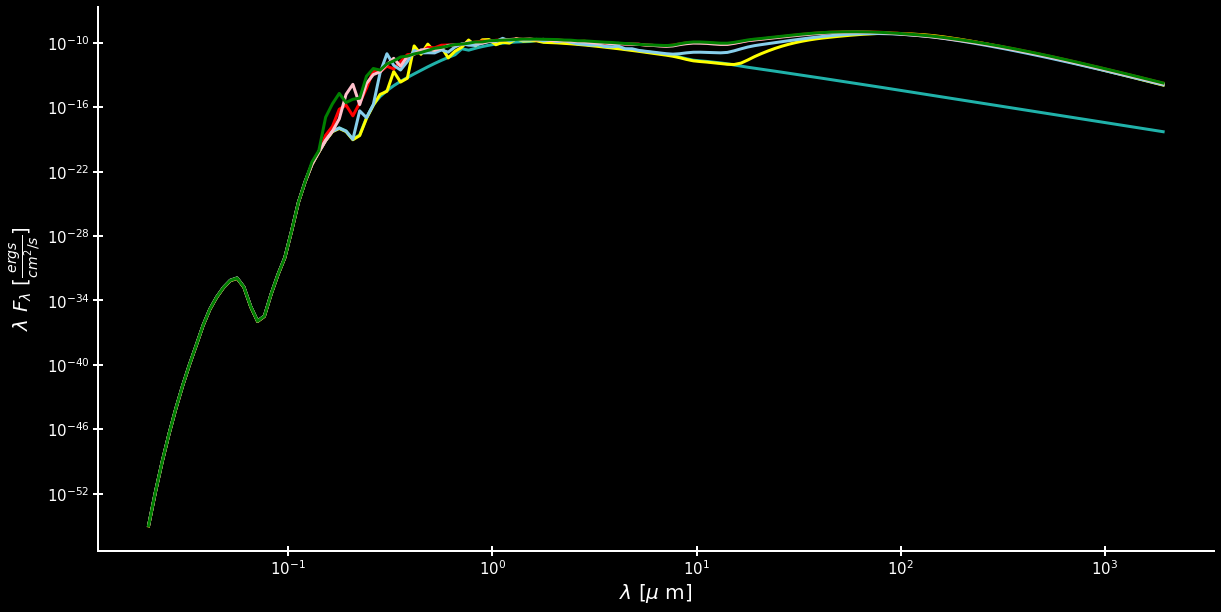

In [125]:
fig = plt.figure(figsize = (20,10), facecolor = "black")
ax = plt.subplot(1,1,1) 

ax.loglog(sed_p1.wav, sed_p1.val.transpose(), linewidth = 3, color = 'lightseagreen')
ax.loglog(sed_p2.wav, sed_p2.val.transpose(), linewidth = 3, color = 'yellow')
ax.loglog(sed_1.wav, sed_1.val.transpose(), linewidth = 3, color = 'red')
ax.loglog(sed_p3.wav, sed_p3.val.transpose(), linewidth = 3, color = 'skyblue')
ax.loglog(sed_p4.wav, sed_p4.val.transpose(), linewidth = 3, color = 'pink')
ax.loglog(sed_p5.wav, sed_p5.val.transpose(), linewidth = 3, color = 'green')

ax.tick_params(direction='inout', length=10, width=2, colors='white', grid_color='white', grid_alpha=0.5)
ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["top"].set_color("white")
ax.spines["right"].set_color("white")
plt.setp(ax.spines.values(), linewidth=2)
#plt.ticklabel_format(axis='both', style='sci', scilimits=(3,4))
plt.rc('font', size = 15) #Fixes the scientific notation font size

#plt.legend(facecolor = "black", labelcolor = "white", fontsize = 15, frameon = False, bbox_to_anchor=(1, 1), loc='upper left')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel(r'$\lambda$ [$\mu$ m]'  , size = '20', color = "white")
plt.ylabel(r'$\lambda$ $F_{\lambda}$ [$\frac{ergs}{cm^2/s}$]' , size = '20', color = "white")
plt.xticks(size = '15')
plt.yticks(size = '15')

#plt.xlim(3700,3900)
#plt.xlim(4200,4400)

plt.show()

- My convergence criteria for the SEDs was to see at what point they start to line up to each other and when the fit the sharper bumbs are smoothed out. 

- From these results it seems like the grid resolution doesn't play as big of a role in the convergense of the SEDs are the photon number does (there is less of a difference between the grid SEDs than with the photon SEDs). For the grid the SED seem to converege after about (73, 50, 3) and upward. For the photon number the SED seems to coverger around the 10^4 photons and after. 